In [97]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import IPython as ip
%matplotlib inline
ip.core.display.set_matplotlib_formats('png', 'jpeg', quality=90)

### Get nvidia smi data using the following cmdline
```$ nvidia-smi dmon -o T -s pucvmt -c 2000 -f prof_out ```

In [98]:
def read_nvdia_smi_dmon(file_path):
    f = open(file_path)
    lines = f.readlines()
    stop_lines = lines[:2]
    titles = stop_lines[0].strip().strip('#').split()
    print(titles)
    print(stop_lines[1])
    data = [] 
    for line in lines:
        if line in stop_lines:
            continue
        data.append(line.strip().split())
    df = pd.DataFrame(data=data, columns=titles)
    df.to_csv("temp_out")
    df = pd.read_csv("temp_out", index_col=0)
    return df

In [108]:
def plot_gpu_set(set_val, gpu_num, input_file):
    """
    set_val: list of gpu params to plot
    gpu_num:  index of gpu to plot
    input_file: nvidia-smi output file
    """
    df = read_nvdia_smi_dmon(input_file)
    gpu_df = df[df.gpu == gpu_num]
    print(gpu_df[set_val].describe())
    for item in set_val:
        if gpu_df[item].empty:
            continue
        print(item)
        gpu_df[item].plot()
        plt.show()


['Time', 'gpu', 'pwr', 'gtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
#HH:MM:SS    Idx     W     C     C     %     %     %     %   MHz   MHz     %  bool    MB    MB  MB/s  MB/s

              pwr       gtemp          sm         mem   mclk    pclk  \
count  100.000000  100.000000  100.000000  100.000000  100.0   100.0   
mean    98.580000   46.990000   15.210000    3.030000  877.0  1432.0   
std     81.266015    4.802135   34.945642    6.978256    0.0     0.0   
min     61.000000   41.000000    0.000000    0.000000  877.0  1432.0   
25%     62.000000   43.000000    0.000000    0.000000  877.0  1432.0   
50%     64.000000   45.000000    0.000000    0.000000  877.0  1432.0   
75%     65.000000   49.250000    0.000000    0.000000  877.0  1432.0   
max    292.000000   61.000000   95.000000   19.000000  877.0  1432.0   

            pviol  tviol          fb        bar1       rxpci       txpci  
count  100.000000  100.0  100.0000

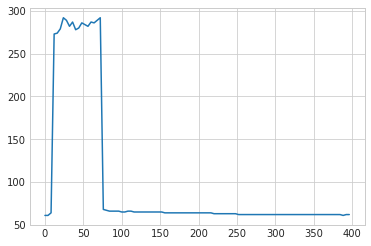

gtemp


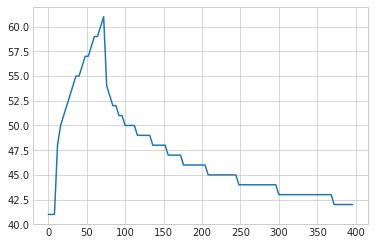

sm


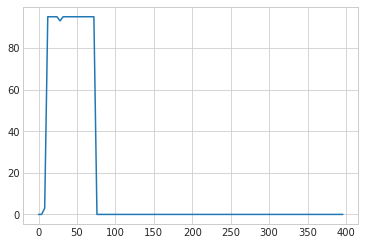

mem


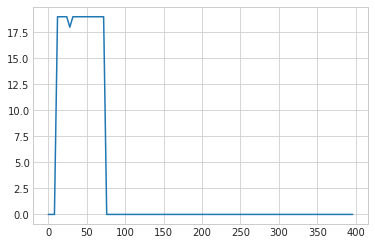

mclk


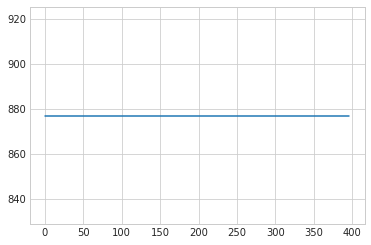

pclk


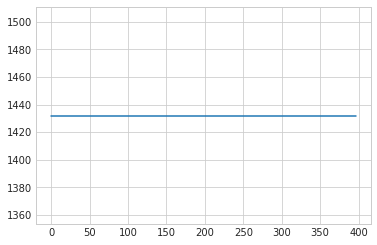

pviol


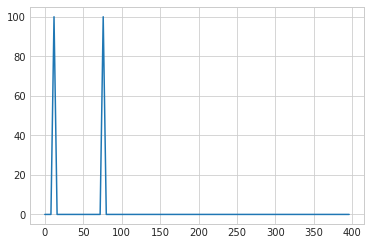

tviol


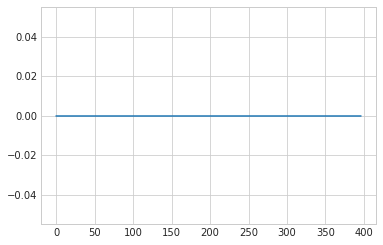

fb


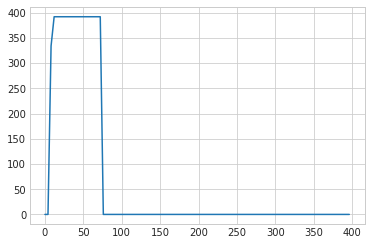

bar1


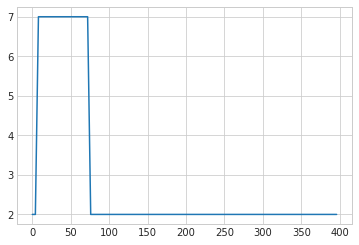

rxpci


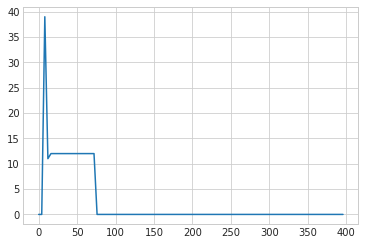

txpci


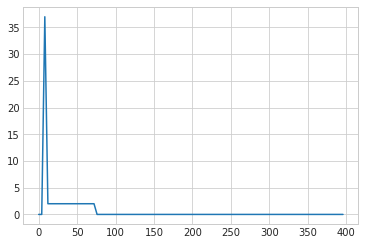

In [120]:
set_values = ['pwr', 'gtemp', 'sm', 'mem', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
gpu_num = 0
input_file = "./prof_input_itr_sweep_1024_4"

plot_gpu_set(set_values, gpu_num, input_file)

In [111]:
HtoD = read_nvdia_smi_dmon("burn_prof_out_3")

['Time', 'gpu', 'pwr', 'gtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
#HH:MM:SS    Idx     W     C     C     %     %     %     %   MHz   MHz     %  bool    MB    MB  MB/s  MB/s



In [89]:
COMP = read_nvdia_smi_dmon("burn_prof_out")

['Time', 'gpu', 'pwr', 'gtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec', 'mclk', 'pclk', 'pviol', 'tviol', 'fb', 'bar1', 'rxpci', 'txpci']
#HH:MM:SS    Idx     W     C     C     %     %     %     %   MHz   MHz     %  bool    MB    MB  MB/s  MB/s



In [100]:
HtoD[:][HtoD.gpu == 0].describe()

,gpu,pwr,gtemp,mtemp,sm,mem,enc,dec,mclk,pclk,pviol,tviol,fb,bar1,rxpci,txpci
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.00000,100.000000,100.00
mean,0.0,71.710000,42.480000,40.040000,10.880000,1.980000,0.0,0.0,877.0,397.470000,0.0,0.0,47.080000,2.55000,0.030000,0.01
std,0.0,78.878284,4.661209,3.784391,31.103698,5.660389,0.0,0.0,0.0,513.425306,0.0,0.0,134.591464,1.57233,0.171447,0.10
min,0.0,42.000000,38.000000,36.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.00000,0.000000,0.00
25%,0.0,42.000000,39.000000,37.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.00000,0.000000,0.00
50%,0.0,42.000000,41.000000,39.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.00000,0.000000,0.00
75%,0.0,44.000000,44.000000,42.000000,0.000000,0.000000,0.0,0.0,877.0,135.000000,0.0,0.0,0.000000,2.00000,0.000000,0.00
max,0.0,299.000000,57.000000,51.000000,99.000000,18.000000,0.0,0.0,877.0,1522.000000,0.0,0.0,428.000000,7.00000,1.000000,1.00


In [95]:
COMP[60:120][COMP.gpu == 2]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Time,gpu,pwr,gtemp,mtemp,sm,mem,enc,dec,mclk,pclk,pviol,tviol,fb,bar1,rxpci,txpci
62,20:03:55,2,42,43,42,0,0,0,0,877,337,0,0,1,3,31,0
66,20:03:57,2,266,46,43,55,9,0,0,877,1417,0,0,14554,7,11,4
70,20:03:58,2,294,51,46,100,27,0,0,877,1462,0,0,14554,7,11,4
74,20:03:59,2,296,53,47,100,18,0,0,877,1470,0,0,14554,7,11,4
78,20:04:00,2,296,54,48,100,18,0,0,877,1462,0,0,14554,7,11,4
82,20:04:02,2,297,55,49,100,18,0,0,877,1455,0,0,14554,7,11,4
86,20:04:03,2,297,56,50,100,18,0,0,877,1455,0,0,14554,7,11,4
90,20:04:04,2,299,57,51,100,18,0,0,877,1455,0,0,14554,7,11,4
94,20:04:05,2,294,57,51,100,18,0,0,877,1455,0,0,14554,7,11,4
98,20:04:07,2,294,58,52,100,18,0,0,877,1455,0,0,14554,7,11,4


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


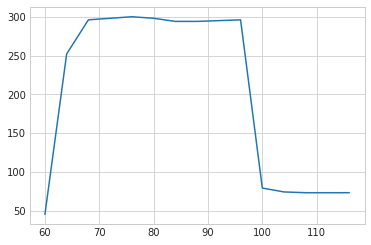

In [96]:
COMP[60:120][COMP.gpu == 0].pwr.plot(kind="line")

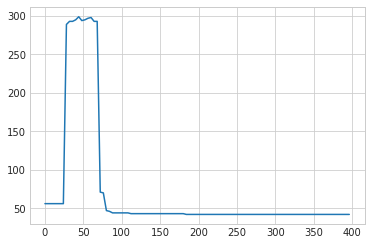

In [101]:
HtoD[:][HtoD.gpu == 0].pwr.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


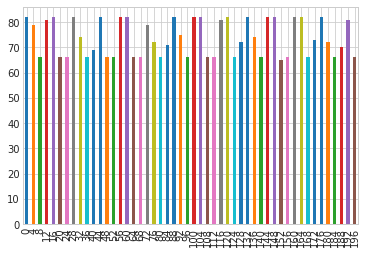

In [78]:
HtoD[:200][HtoD.gpu == 0].sm.plot(kind="bar")

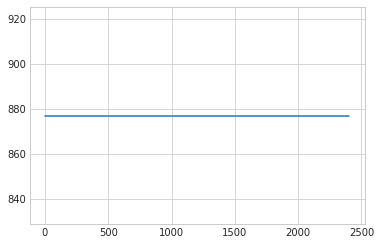

In [73]:
HtoD[:][HtoD.gpu == 0].mclk.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


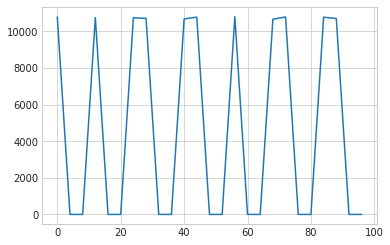

In [65]:
HtoD[:100][HtoD.gpu == 0].rxpci.plot(kind="line")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


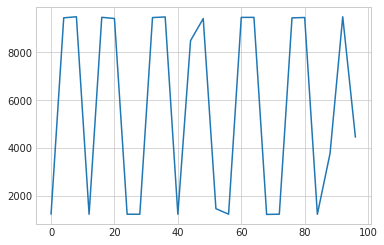

In [66]:
HtoD[:100][HtoD.gpu == 0].txpci.plot(kind="line")

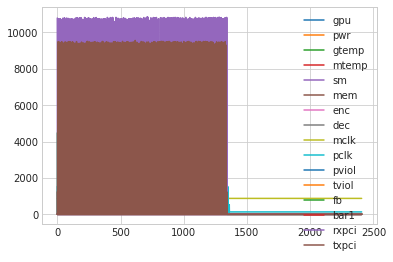

In [43]:
df.plot()

In [29]:
titles

['Time',
 'gpu',
 'pwr',
 'gtemp',
 'mtemp',
 'sm',
 'mem',
 'enc',
 'dec',
 'mclk',
 'pclk',
 'pviol',
 'tviol',
 'fb',
 'bar1',
 'rxpci',
 'txpci']

In [27]:
data

[['13:07:43',
  '0',
  '68',
  '42',
  '39',
  '82',
  '4',
  '0',
  '0',
  '877',
  '1530',
  '0',
  '0',
  '4476',
  '7',
  '10788',
  '1236'],
 ['13:07:43',
  '1',
  '42',
  '34',
  '32',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:43',
  '2',
  '39',
  '33',
  '30',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:43',
  '3',
  '39',
  '36',
  '34',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '0',
  '68',
  '42',
  '39',
  '79',
  '4',
  '0',
  '0',
  '877',
  '1530',
  '0',
  '0',
  '4476',
  '7',
  '2',
  '9447'],
 ['13:07:44',
  '1',
  '42',
  '34',
  '32',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '2',
  '39',
  '33',
  '30',
  '0',
  '0',
  '0',
  '0',
  '877',
  '135',
  '0',
  '0',
  '11',
  '3',
  '0',
  '0'],
 ['13:07:44',
  '3',
  '39',
  '36',
